In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

plt.style.use('ggplot')

In [2]:
datamon = pd.read_csv('pokemon.csv')

In [3]:
datamon.head()

,NUMBER,CODE,SERIAL,NAME,TYPE1,TYPE2,COLOR,ABILITY1,ABILITY2,ABILITY HIDDEN,...,MEGA_EVOLUTION,HEIGHT,WEIGHT,HP,ATK,DEF,SP_ATK,SP_DEF,SPD,TOTAL
0,1,1,11,Bulbasaur,Grass,Poison,Green,Overgrow,NaN,Chrolophyll,...,0,0.7,6.9,45,49,49,65,65,45,318
1,2,1,21,Ivysaur,Grass,Poison,Green,Overgrow,NaN,Chrolophyll,...,0,1.0,13.0,60,62,63,80,80,60,405
2,3,1,31,Venusaur,Grass,Poison,Green,Overgrow,NaN,Chrolophyll,...,0,2.0,100.0,80,82,83,100,100,80,525
3,3,2,32,Mega Venusaur,Grass,Poison,Green,Thick Fat,NaN,NaN,...,1,2.4,155.5,80,100,123,122,120,80,625
4,4,1,41,Charmander,Fire,NaN,Red,Blaze,NaN,Solar Power,...,0,0.6,8.5,39,52,43,60,50,65,309


In [4]:
datamon.columns

Index(['NUMBER', 'CODE', 'SERIAL', 'NAME', 'TYPE1', 'TYPE2', 'COLOR',
       'ABILITY1', 'ABILITY2', 'ABILITY HIDDEN', 'GENERATION', 'LEGENDARY',
       'MEGA_EVOLUTION', 'HEIGHT', 'WEIGHT', 'HP', 'ATK', 'DEF', 'SP_ATK',
       'SP_DEF', 'SPD', 'TOTAL'],
      dtype='object')

In [5]:
datamon['bulk'] = (((datamon.HP+102) * (18+datamon[['DEF', 'SP_DEF']].min(axis=1)))/100).astype(int)
datamon['power'] = datamon[['ATK', 'SP_ATK']].max(axis=1)

In [6]:
#log_data = log_data[(pokemon.LEGENDARY==0) & (pokemon.MEGA_EVOLUTION==0)]
imp_params = ['NUMBER', 'NAME', 'power', 'bulk', 'SPD', 'LEGENDARY']

In [7]:
datamon.to_csv('mondata.csv')

In [8]:
datamon.sort_values('bulk', ascending = False).head()[imp_params]

,NUMBER,NAME,power,bulk,SPD,LEGENDARY
846,718,Zygarde,100,359,85,1
581,487,Giratina,100,347,90,1
1035,889,Zamazanta,130,316,128,1
296,249,Lugia,90,307,110,1
583,488,Cresselia,75,306,85,1


In [9]:
datamon.sort_values('power', ascending = False).head()[imp_params]

,NUMBER,NAME,power,bulk,SPD,LEGENDARY
190,150,Mega Mewtwo Y,194,183,140,1
189,150,Mega Mewtwo X,190,245,130,1
258,214,Mega Heracross,185,223,75,0
936,798,Kartana,181,78,109,1
461,386,Deoxys,180,57,150,1


In [10]:
datamon.sort_values('SPD', ascending = False).head()[imp_params]

,NUMBER,NAME,power,bulk,SPD,LEGENDARY
463,386,Deoxys,95,164,180,1
344,291,Ninjask,90,102,160,0
933,795,Pheromosa,137,95,151,1
460,386,Deoxys,150,103,150,1
180,142,Mega Aerodactyl,135,187,150,0


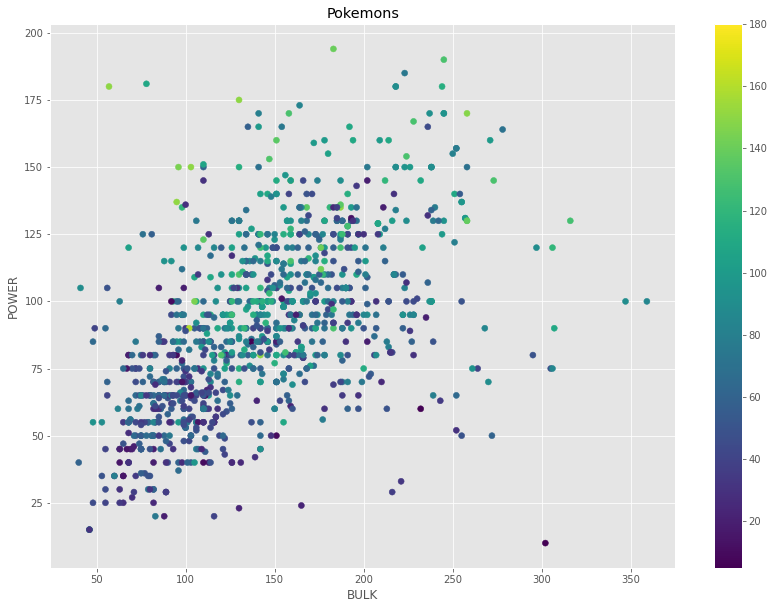

In [11]:
plt.figure(figsize = (14, 10))

plt.scatter(
    datamon.bulk,
    datamon.power,
    c=datamon.SPD, 
)
plt.title('Pokemons')
plt.xlabel('BULK')
plt.ylabel('POWER')
plt.colorbar()
plt.show()

In [12]:
powermax = max(datamon.power)
print (powermax)
bulkmax = max(datamon.bulk)
print (bulkmax)

194
359


In [13]:
goodmons = datamon[(datamon.power>=100) & (datamon.bulk>=183)]
# goodmons = datamon[datamon.power*datamon.bulk>=14300]
goodmons = goodmons[['NUMBER', 'NAME', 'power', 'bulk', 'SPD', 'LEGENDARY']]

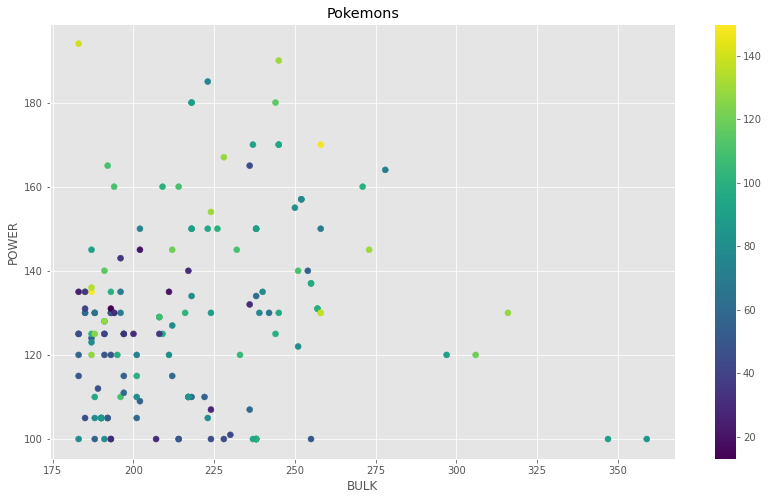

In [14]:
plt.figure(figsize = (14, 8))

plt.scatter(
    goodmons.bulk,
    goodmons.power,
    c=goodmons.SPD
)
plt.title('Pokemons')
plt.xlabel('BULK')
plt.ylabel('POWER')
plt.colorbar()
plt.show()

<div class='tableauPlaceholder' id='viz1609597511432' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Po&#47;PokemonComparison_16095972923640&#47;PokemonsComparison&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='PokemonComparison_16095972923640&#47;PokemonsComparison' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Po&#47;PokemonComparison_16095972923640&#47;PokemonsComparison&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1609597511432');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='650px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='650px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='1227px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

https://public.tableau.com/views/PokemonComparison_16095972923640/PokemonsComparison?:language=en&:display_count=y&publish=yes&:origin=viz_share_link